#### [ 미니 테스트  2024-03-14 ]<hr>

[1] 지도학습에 대한 설명과 종류에 대해서 간략하게 설명해 주세요.

지도학습은 답과 문제를 알려준다. 그래서 이러한 특성에는 이러한 답을 가진다는 것을 학습시킨다

[2] 지도학습의 학습 프로세스를 간략하게 설명해 주세요.

모듈 불러오기 > 전처리 > 데이터셋 분리 > 학습 > 검증 > 예측 > 성능평가

[3] 선형회귀 대해 간략하게 설명해주세요.  
    - 개념  
    - 조건  
    - 동작원리  
    - 선형식  
    - 오차/잔차 계산 방법  

- 개념 : 선형 회귀는 어떠한 특성을 가질때 이러한 답을 가질 것이다라고 예측하는 것에 가깝다. 
- 조건 : ????
- 동작원리 & 선형식 : 학습시 y = aX + b에서 a(기울기) b(절편)의 값을 알아낸다. 여기서 X는 피처가 되고 y는 타겟이 된다.
- 오차/잔차 계산 방법 : 예측값에서 실제값을 뺸다. (y_pre - y_test)

[4] 로지스틱회귀 대해 간략하게 설명해주세요.  
   - 개념  
   - 조건  
   - 동작원리  
   - 선형식  
   - 오차/잔차 계산 방법  

- 개념 : 회귀라는 이름이라 회귀라고 생각하기 쉽다. 하지만 실제는 분류이다. y = aX + b 라는 식이 세워졌을 때 어떤 기준 값보다 크면 1로 어떤 기준값보다 작으면 0으로 분류한다. 
- 조건 : ?????
- 동작원리 : y = aX + b 라고 할때 학습시켜서 기울기인 a , 절편인 b가 나온다. 그리고 피처를 넣어서 어떠한 타겟 갑싱 나오면 기준선에 따라 분류가 된다.
- 오차/잔차 계산 방법 : 예측값에서 실제값을 뺸다. 

[5] Fashion MNIST 데이터셋에서 10개 카테고리 중 하나를 선택해서 2진 분류로 구현해 주세요.  
- 데이터셋 : scikit-learn의 datasets 사용
    - from sklearn.datasets import fetch_openml 
    - db_name = 'Fashion-MNIST'
    - fashion_data = fetch_openml(name=db_name, parser='auto')

In [83]:
import sklearn
from sklearn.datasets import fetch_openml

file = fetch_openml('Fashion-MNIST', parser = 'auto')
data = file['data']
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
file.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [85]:
data['target'] = file['target']
data.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
data['target'] = data['target'].replace({'2':'1', '3':'1', '4':'1', '5':'1', '6':'1', '7':'1', '8':'1', '9':'1'})
data['target'].value_counts()

target
1    63000
0     7000
Name: count, dtype: int64

In [87]:
data.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,22,...,0,0,0,133,167,73,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,1,1,0,0,0,...,0,3,0,82,237,231,70,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [88]:
col_list = data.columns.tolist()

In [89]:
from sklearn.model_selection import train_test_split

target = data[col_list[-1]]
feature = data[col_list[:-1]]

X_train, X_test, y_train, y_test = train_test_split(feature, target, stratify=target, random_state=41)

In [90]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\ProgramData\anaconda3\envs\Torch_PY38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9597142857142857

In [91]:
y_pred = model.predict(X_test)
y_pred

array(['1', '1', '0', ..., '1', '1', '0'], dtype=object)

In [92]:
y_test

44498    0
22763    1
21366    0
47771    1
15262    1
        ..
12116    0
47642    1
15940    1
54135    0
33165    0
Name: target, Length: 17500, dtype: category
Categories (2, object): ['0', '1']

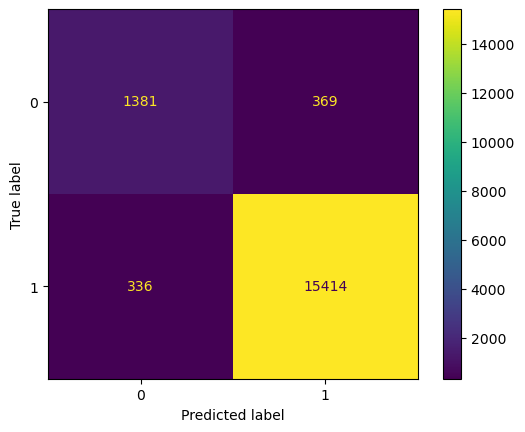

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
result = ConfusionMatrixDisplay(cm)
result.plot()